In [1]:
import logging

logging.basicConfig(level=logging.INFO)


In [2]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss, MSELoss

# from pennylane import NesterovMomentumOptimizer

from qcc.ml.data import Data, BinaryData
from qcc.ml.optimize import Optimizer
from qcc.ml.data import ImageTransform, ImageTransform1D, ClassicalImageTransform
from qcc.experiment import Experiment
from qcc.ml.model import Model

from pathlib import Path
from qcc.file import new_dir

from qcc.quantum.pennylane.ansatz import MQCCOptimized # as Module
# from qcc.quantum.pennylane.ansatz import QCNN as Module
# from qcc.ml.cnn import ConvolutionalNeuralNetwork as Module
# from qcc.ml.mlp import MultiLayerPerceptron as Module
# from qcc.ml.quanvolution import QuanvolutionalNeuralNetwork as Module
from qcc.ml.quantum import MQCCNonHybrid as Module

# from qcc.quantum.pennylane.ansatz.basic import BasicFiltering6
from qcc.quantum.pennylane.pyramid import Pyramid
from qcc.quantum.pennylane.c2q import ConvolutionAngleFilter, ConvolutionComplexAngleFilter, ConvolutionFilter
from qcc.quantum.pennylane.local import define_filter
from qcc.ml.quantum import AnsatzFilter


In [3]:
# Meta parameters
name = "sdfljhvosdv"
filename = Path(f"results/{name}")
num_trials = 1
silent = False
is_quantum = False

# Ansatz parameters
dims = (16, 16, 1)
num_layers = 3
module_options = {
    "U_kernel": ConvolutionAngleFilter,
    # "pre_op": True,
    "num_features": 4,
    "U_fully_connected": ConvolutionAngleFilter,
    # "pooling": True,
    # "kernel_shape": (2, 2),
    # "q2c_method": "parity"
    # "bias": False
    "ansatz": MQCCOptimized
}


In [4]:
filename = new_dir(filename, overwrite=True)
filename = filename / name

if is_quantum:
    module = Module.from_dims
else:
    module = Module

# Create module
module = module(
    dims,
    num_layers=num_layers,
    **module_options,
)
data = BinaryData(
    FashionMNIST,
    ImageTransform1D(dims) if is_quantum else ClassicalImageTransform(dims),
    batch_size=(8, 16),
)
optimizer = Optimizer(Adam)
loss = CrossEntropyLoss()
model = Model.with_logging(module, data, optimizer, loss, epoch=8)

# Log important values
model.logger.info(f"Circuit ID: {name}")
model.logger.info(f"{module=}")
model.logger.info(f"{data=}")
model.logger.info(f"{optimizer=}")
model.logger.info(f"{loss=}")

model.logger.info(f"{num_trials=}")
model.logger.info(f"{dims=}")
model.logger.info(f"{num_layers=}")
# model.logger.info(f"{1=}")
model.logger.info(f"{module_options=}")

# Save circuit drawing
if is_quantum:
    draw_path = filename.with_stem(f"{name}_circuit")
    module.draw(filename=draw_path, decompose=True)


INFO:qcc.quantum.pennylane.ansatz.ansatz:Depth: 21
INFO:qcc.quantum.pennylane.ansatz.ansatz:Gate Count: 78
INFO:qcc.quantum.pennylane.ansatz.ansatz:Depth: 20
INFO:qcc.quantum.pennylane.ansatz.ansatz:Gate Count: 68
INFO:qcc.quantum.pennylane.ansatz.ansatz:Depth: 19
INFO:qcc.quantum.pennylane.ansatz.ansatz:Gate Count: 62
INFO:qcc.quantum.pennylane.ansatz.ansatz:Depth: 33
INFO:qcc.quantum.pennylane.ansatz.ansatz:Gate Count: 131
2023-12-15 16:06:14,837: (mqccnonhybrid) Circuit ID: sdfljhvosdv
2023-12-15 16:06:14,837: (mqccnonhybrid) module=MQCCNonHybrid(
  (0): MQCCLayer(
    (mqcc): MQCCOptimized()
  )
  (1): MQCCLayer(
    (mqcc): MQCCOptimized()
  )
  (2): MQCCLayer(
    (mqcc): MQCCOptimized()
  )
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): FullyConnectedLayer(
    (fc): FullyConnected()
  )
)
2023-12-15 16:06:14,837: (mqccnonhybrid) data=BinaryData(dataset=<class 'torchvision.datasets.mnist.FashionMNIST'>, transform=image_transform_classical, target_transform=None, batch_size=(8, 1

In [5]:
# Run experiment
results_schema = ["accuracy", "training_time", "testing_time"]
experiment = Experiment(model, num_trials, results_schema)
# experiment.partial(silent=silent)
results = experiment(filename=filename)


2023-12-15 16:06:14,894: (mqccnonhybrid) Number of Parameters: 82
2023-12-15 16:08:16,254: (mqccnonhybrid) (Epoch 1) Training took 120.12860 sec
2023-12-15 16:08:24,807: (mqccnonhybrid) (Epoch 1) Testing took: 8.37762 sec
2023-12-15 16:08:24,807: (mqccnonhybrid) (Epoch 1) Accuracy: 93.400%
2023-12-15 16:10:22,389: (mqccnonhybrid) (Epoch 2) Training took 237.03348 sec
2023-12-15 16:10:30,332: (mqccnonhybrid) (Epoch 2) Testing took: 7.83676 sec
2023-12-15 16:10:30,332: (mqccnonhybrid) (Epoch 2) Accuracy: 93.800%
2023-12-15 16:17:40,965: (mqccnonhybrid) (Epoch 3) Training took 355.36839 sec
2023-12-15 16:17:49,507: (mqccnonhybrid) (Epoch 3) Testing took: 8.31377 sec
2023-12-15 16:17:49,507: (mqccnonhybrid) (Epoch 3) Accuracy: 94.250%
2023-12-15 16:19:51,661: (mqccnonhybrid) (Epoch 4) Training took 475.90711 sec
2023-12-15 16:19:59,586: (mqccnonhybrid) (Epoch 4) Testing took: 7.81468 sec
2023-12-15 16:19:59,586: (mqccnonhybrid) (Epoch 4) Accuracy: 94.600%
2023-12-15 16:21:58,551: (mqccnonh

2023-12-15 16:28:47,573: (mqccnonhybrid) accuracy: median=0.9539999961853027, mean=0.9539999961853027, max=0.9539999961853027, min=0.9539999961853027, std=None
2023-12-15 16:28:47,574: (mqccnonhybrid) training_time: median=963.9263919590002, mean=963.9263919590002, max=963.9263919590002, min=963.9263919590002, std=None
2023-12-15 16:28:47,574: (mqccnonhybrid) testing_time: median=8.461613332999946, mean=8.461613332999946, max=8.461613332999946, min=8.461613332999946, std=None


(<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>)

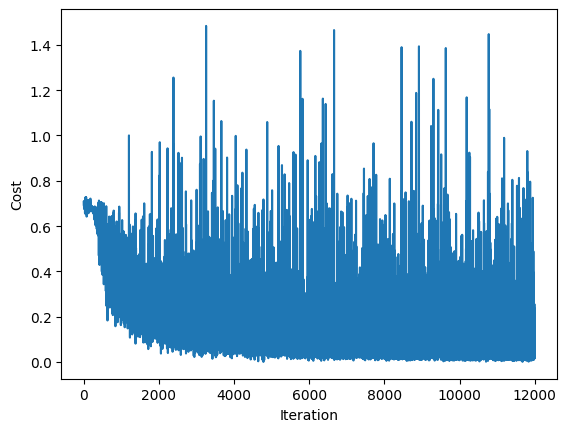

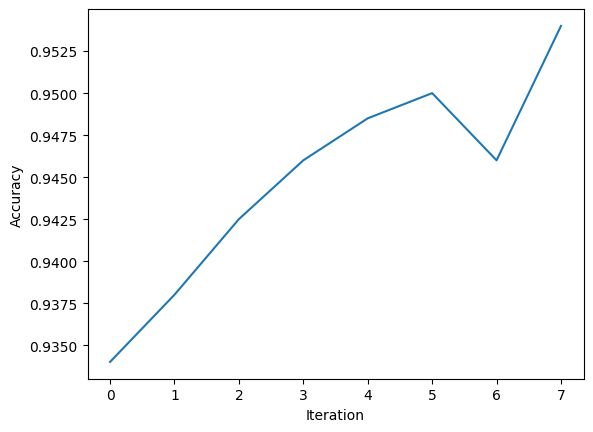

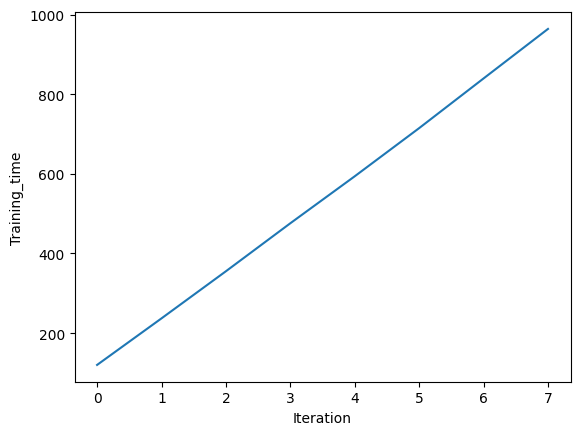

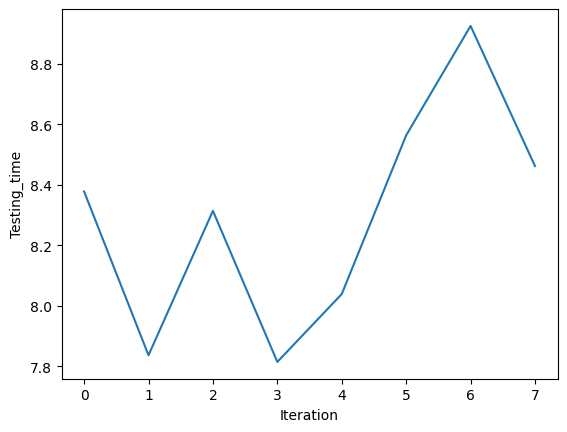

In [6]:
# Print accuracy results
metrics = ("median", "mean", "max", "min", "std")
for name in results.columns:
    col = results[name]
    msg = (f"{metric}={getattr(col, metric)()}" for metric in metrics)
    msg = ", ".join(msg)
    msg = f"{name}: {msg}"
    model.logger.info(msg)

# Save aggregated loss history figure
display(experiment.draw(filename))
